In [ ]:
!nvidia-smi

Wed May 22 08:28:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.9/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Assignment 3

/content/drive/MyDrive/Assignment 3


In [ ]:
!ls

data.yaml  {HOME}  runs  TomatoData  YOLOv8.ipynb  yolov8s.pt


In [ ]:
%cd /content/drive/MyDrive/Assignment 3

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=30 imgsz=280 plots=True

/content/drive/MyDrive/Assignment 3
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=30, patience=50, batch=16, imgsz=280, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False,

In [ ]:
!ls runs/detect/train/

args.yaml					    results.png		   val_batch0_pred.jpg
confusion_matrix.png				    train_batch0.jpg	   val_batch1_labels.jpg
events.out.tfevents.1716026090.21ac9230964e.3828.0  train_batch1.jpg	   val_batch1_pred.jpg
F1_curve.png					    train_batch2.jpg	   val_batch2_labels.jpg
P_curve.png					    train_batch460.jpg	   val_batch2_pred.jpg
PR_curve.png					    train_batch461.jpg	   weights
R_curve.png					    train_batch462.jpg
results.csv					    val_batch0_labels.jpg


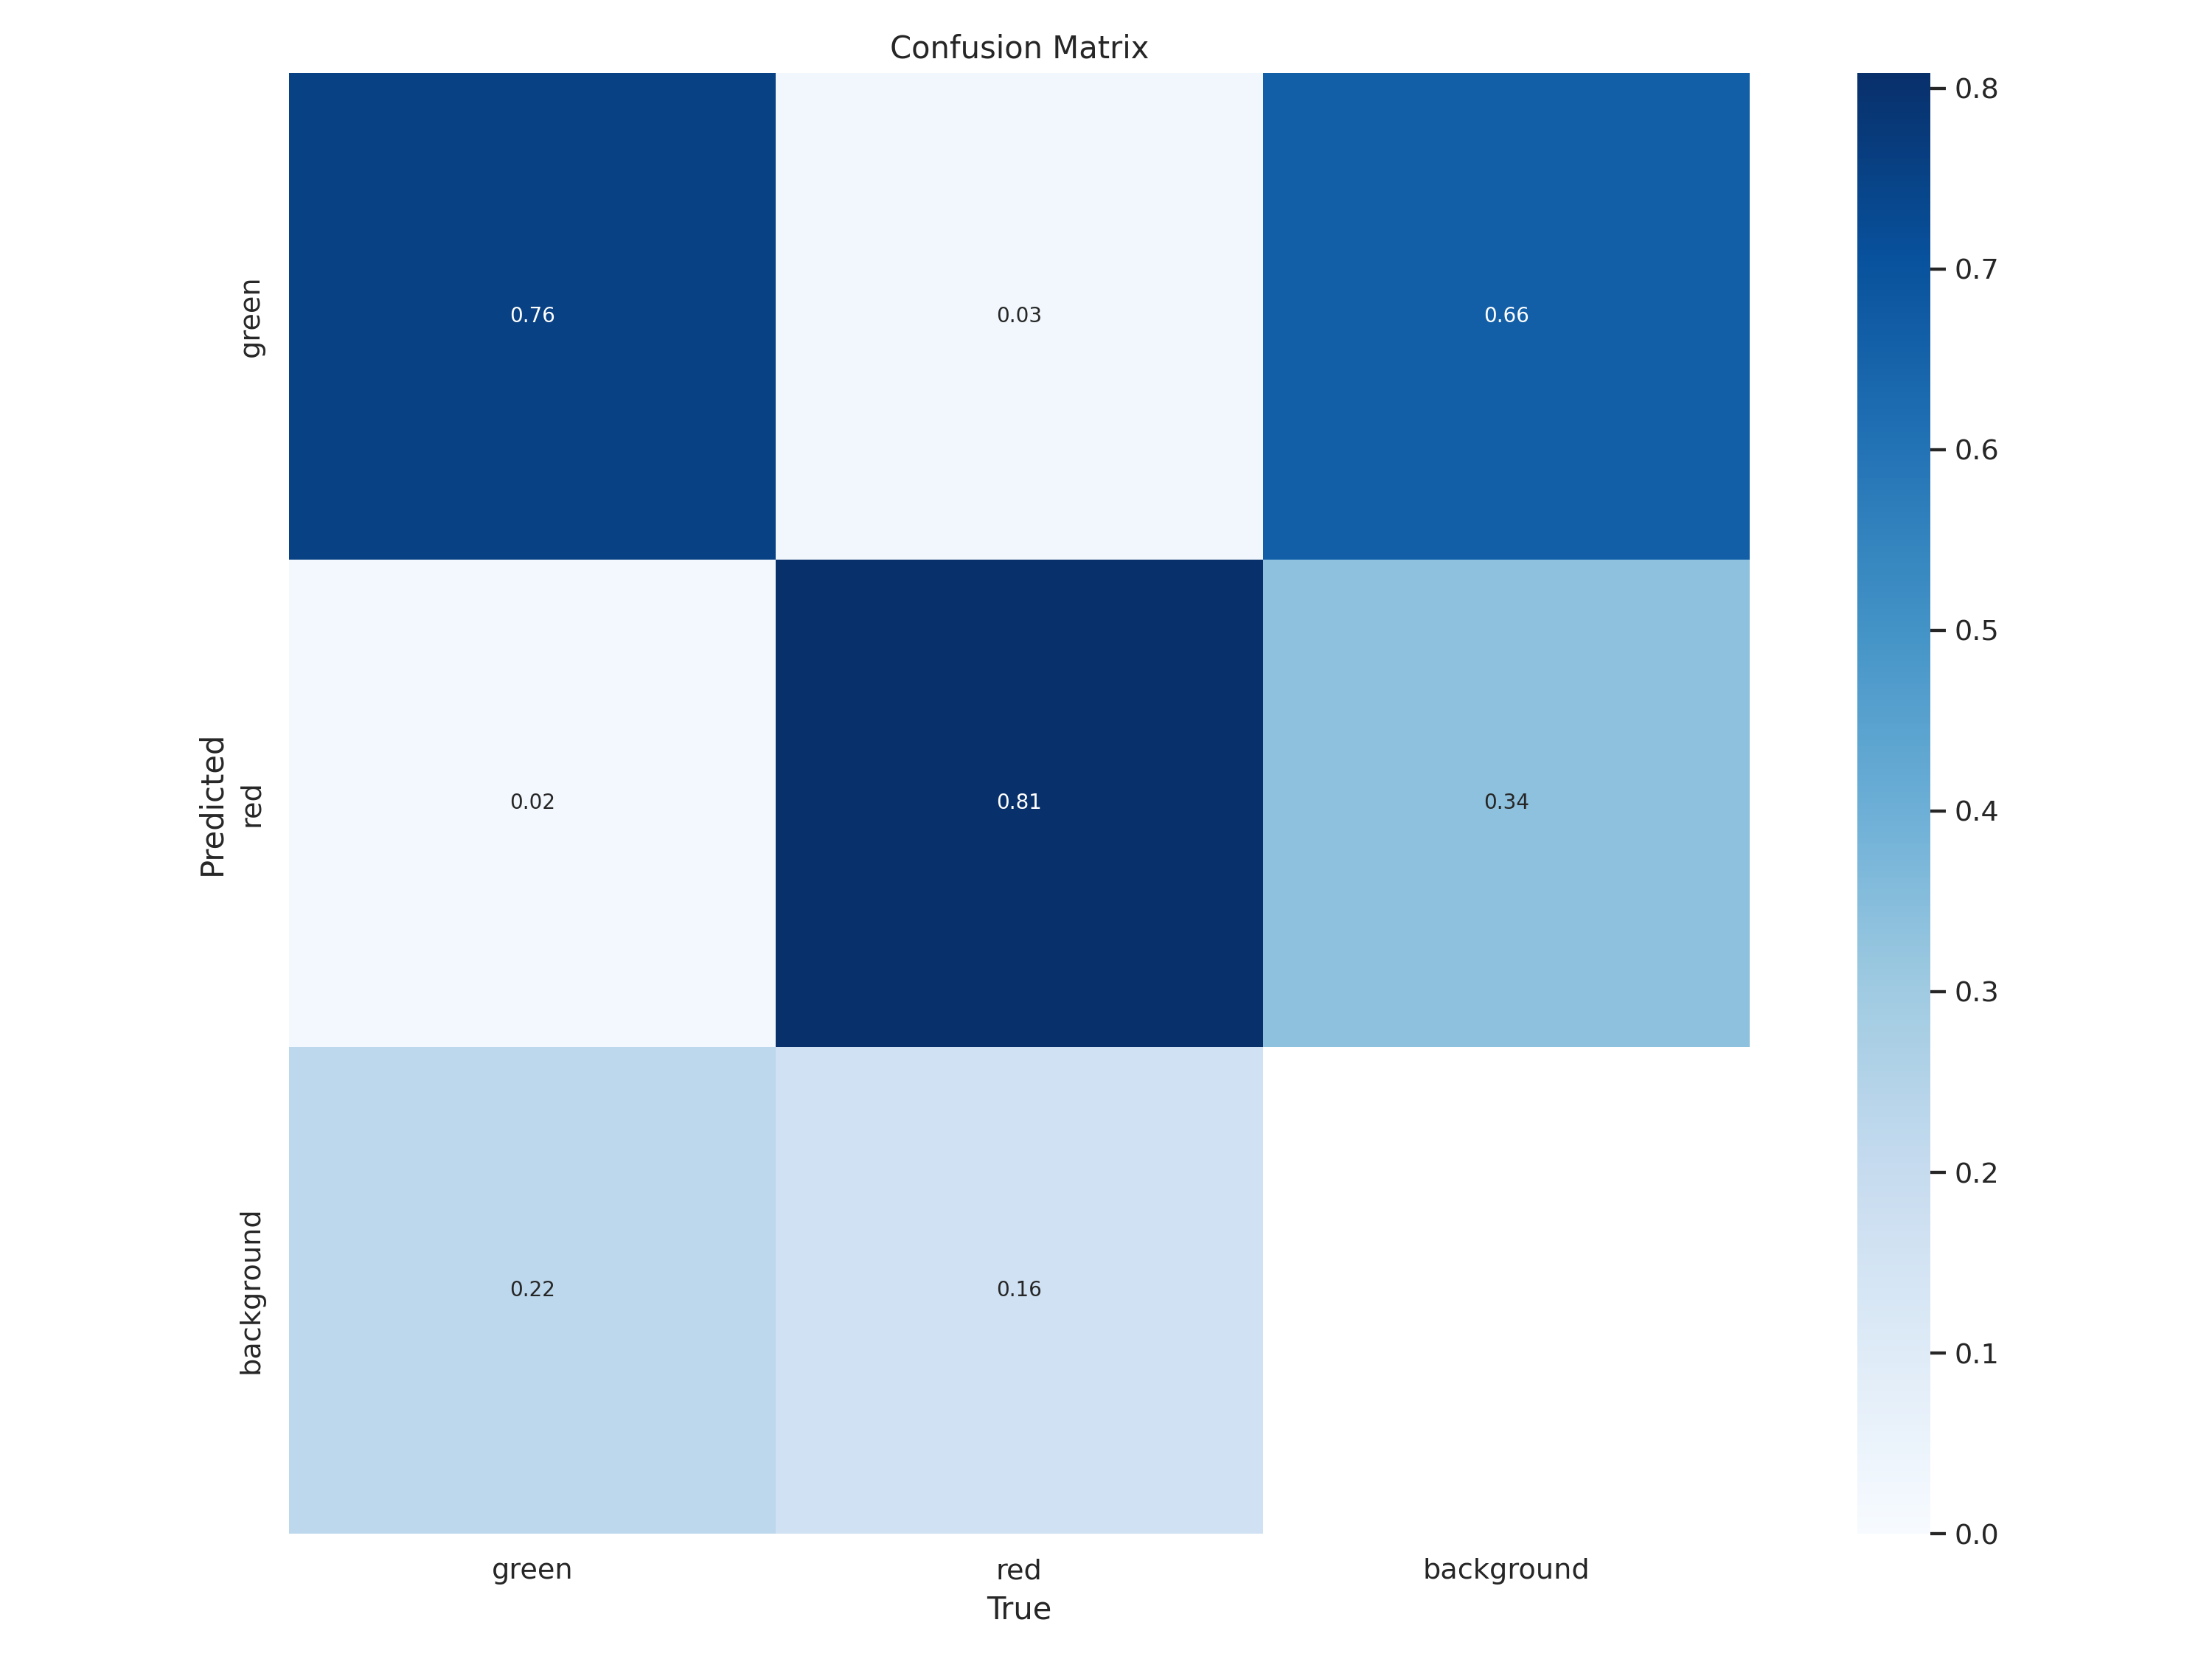

In [ ]:
Image(filename='/content/drive/MyDrive/Assignment 3/runs/detect/train/confusion_matrix.png', width=600)

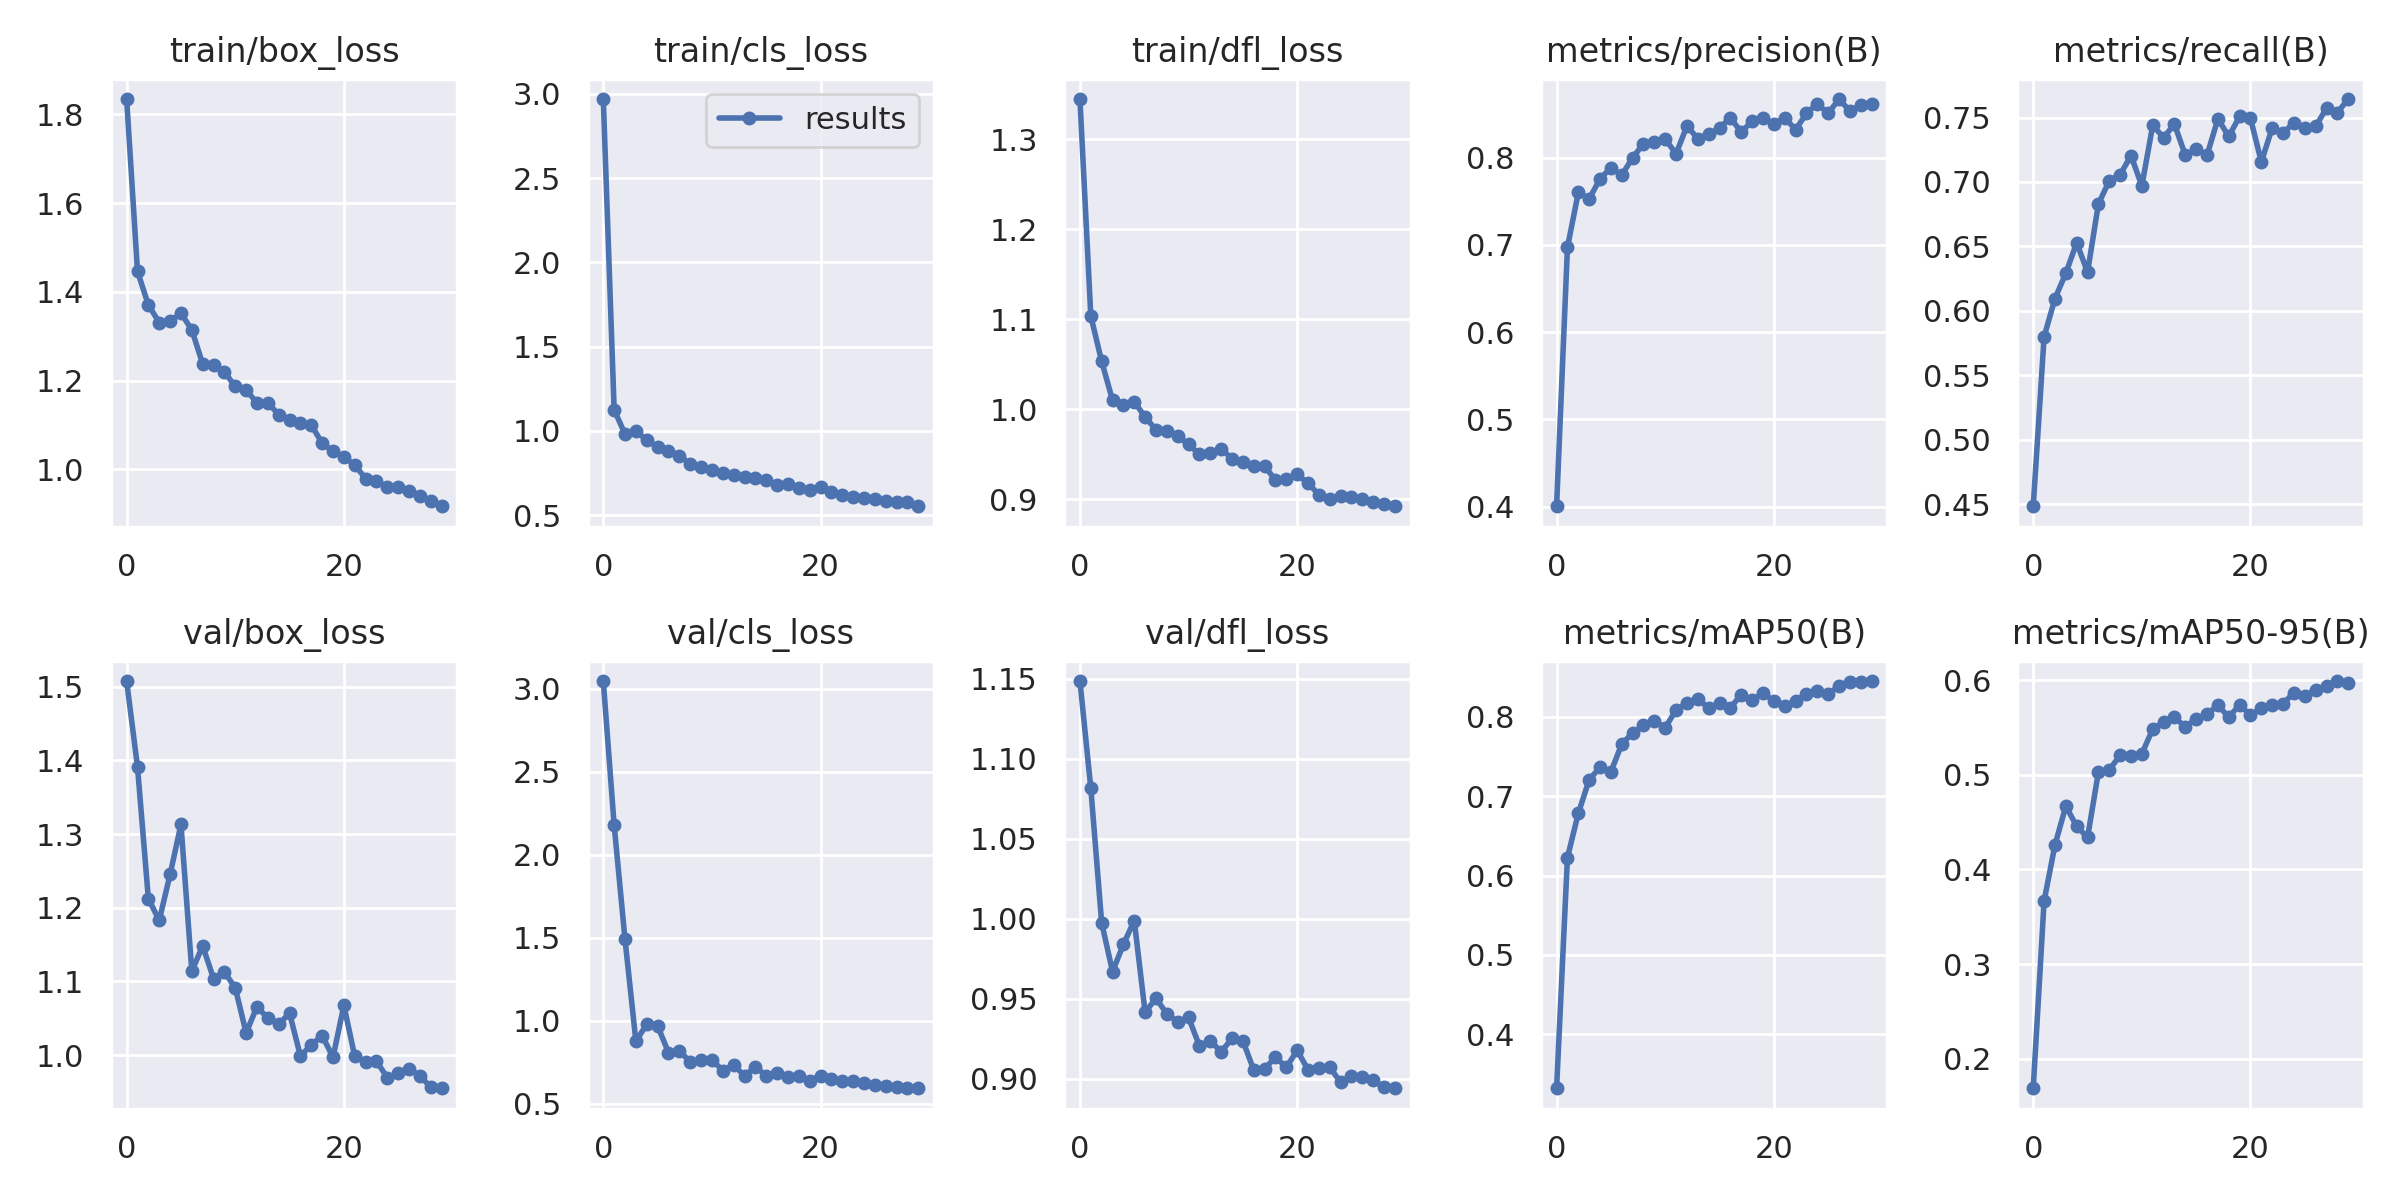

In [ ]:
Image(filename='runs/detect/train/results.png', width=600)

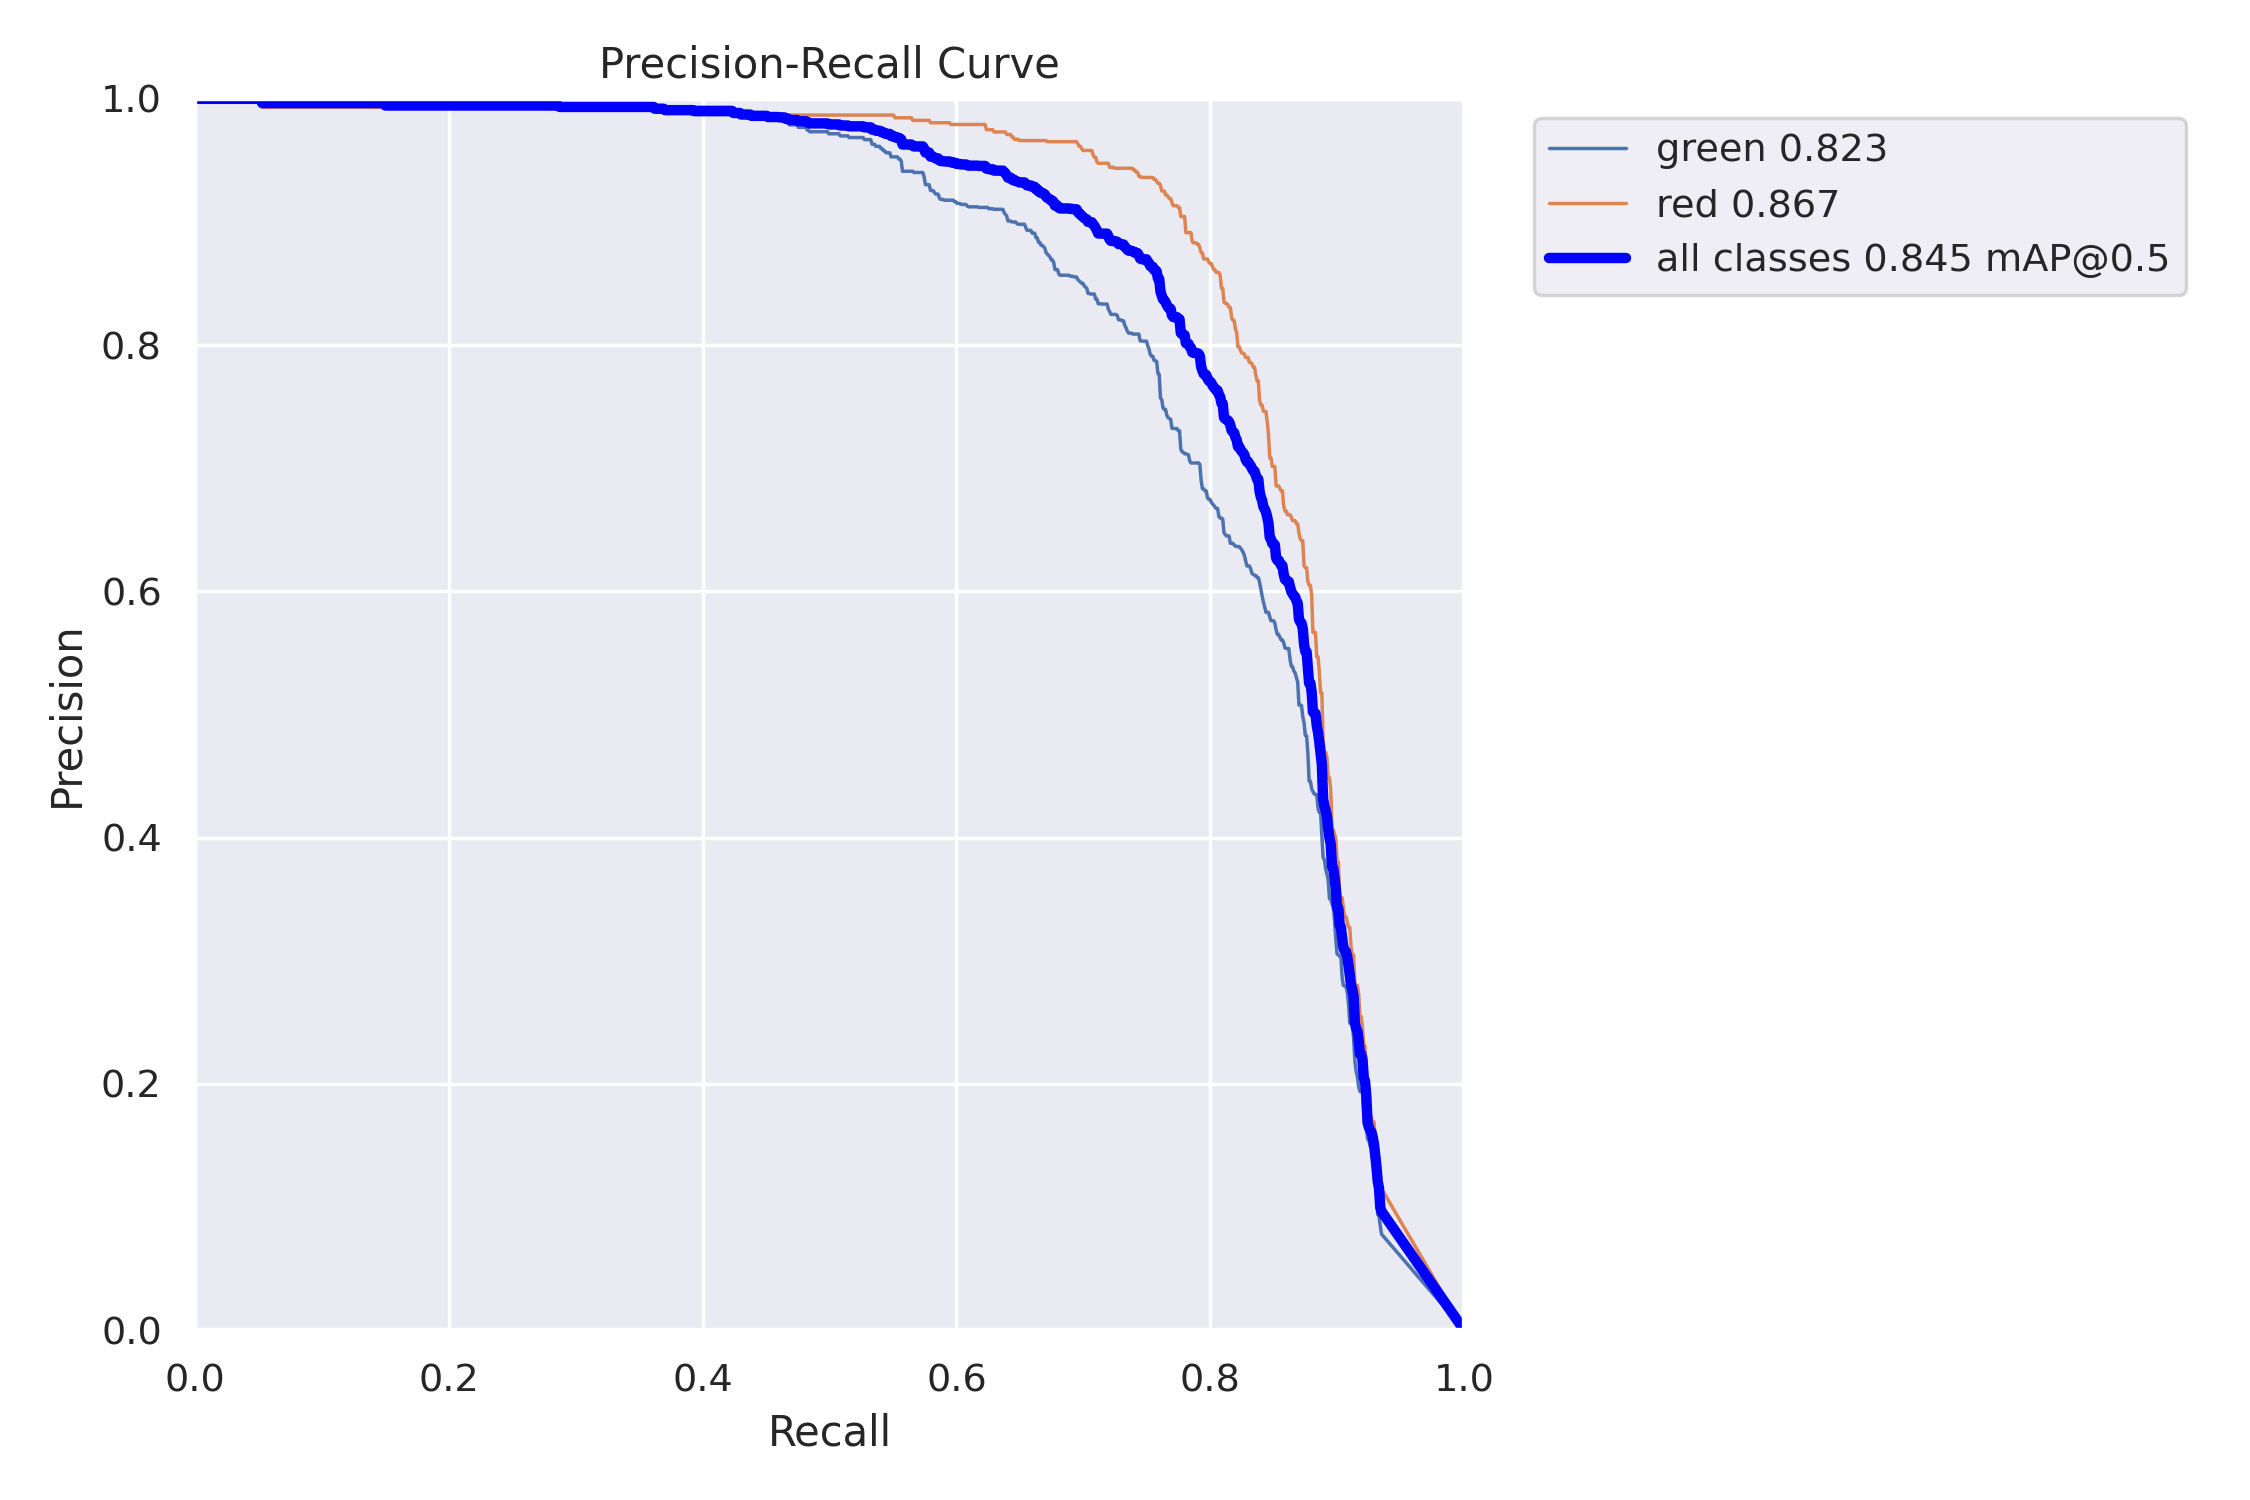

In [ ]:
Image(filename='runs/detect/train/PR_curve.png', width=600)

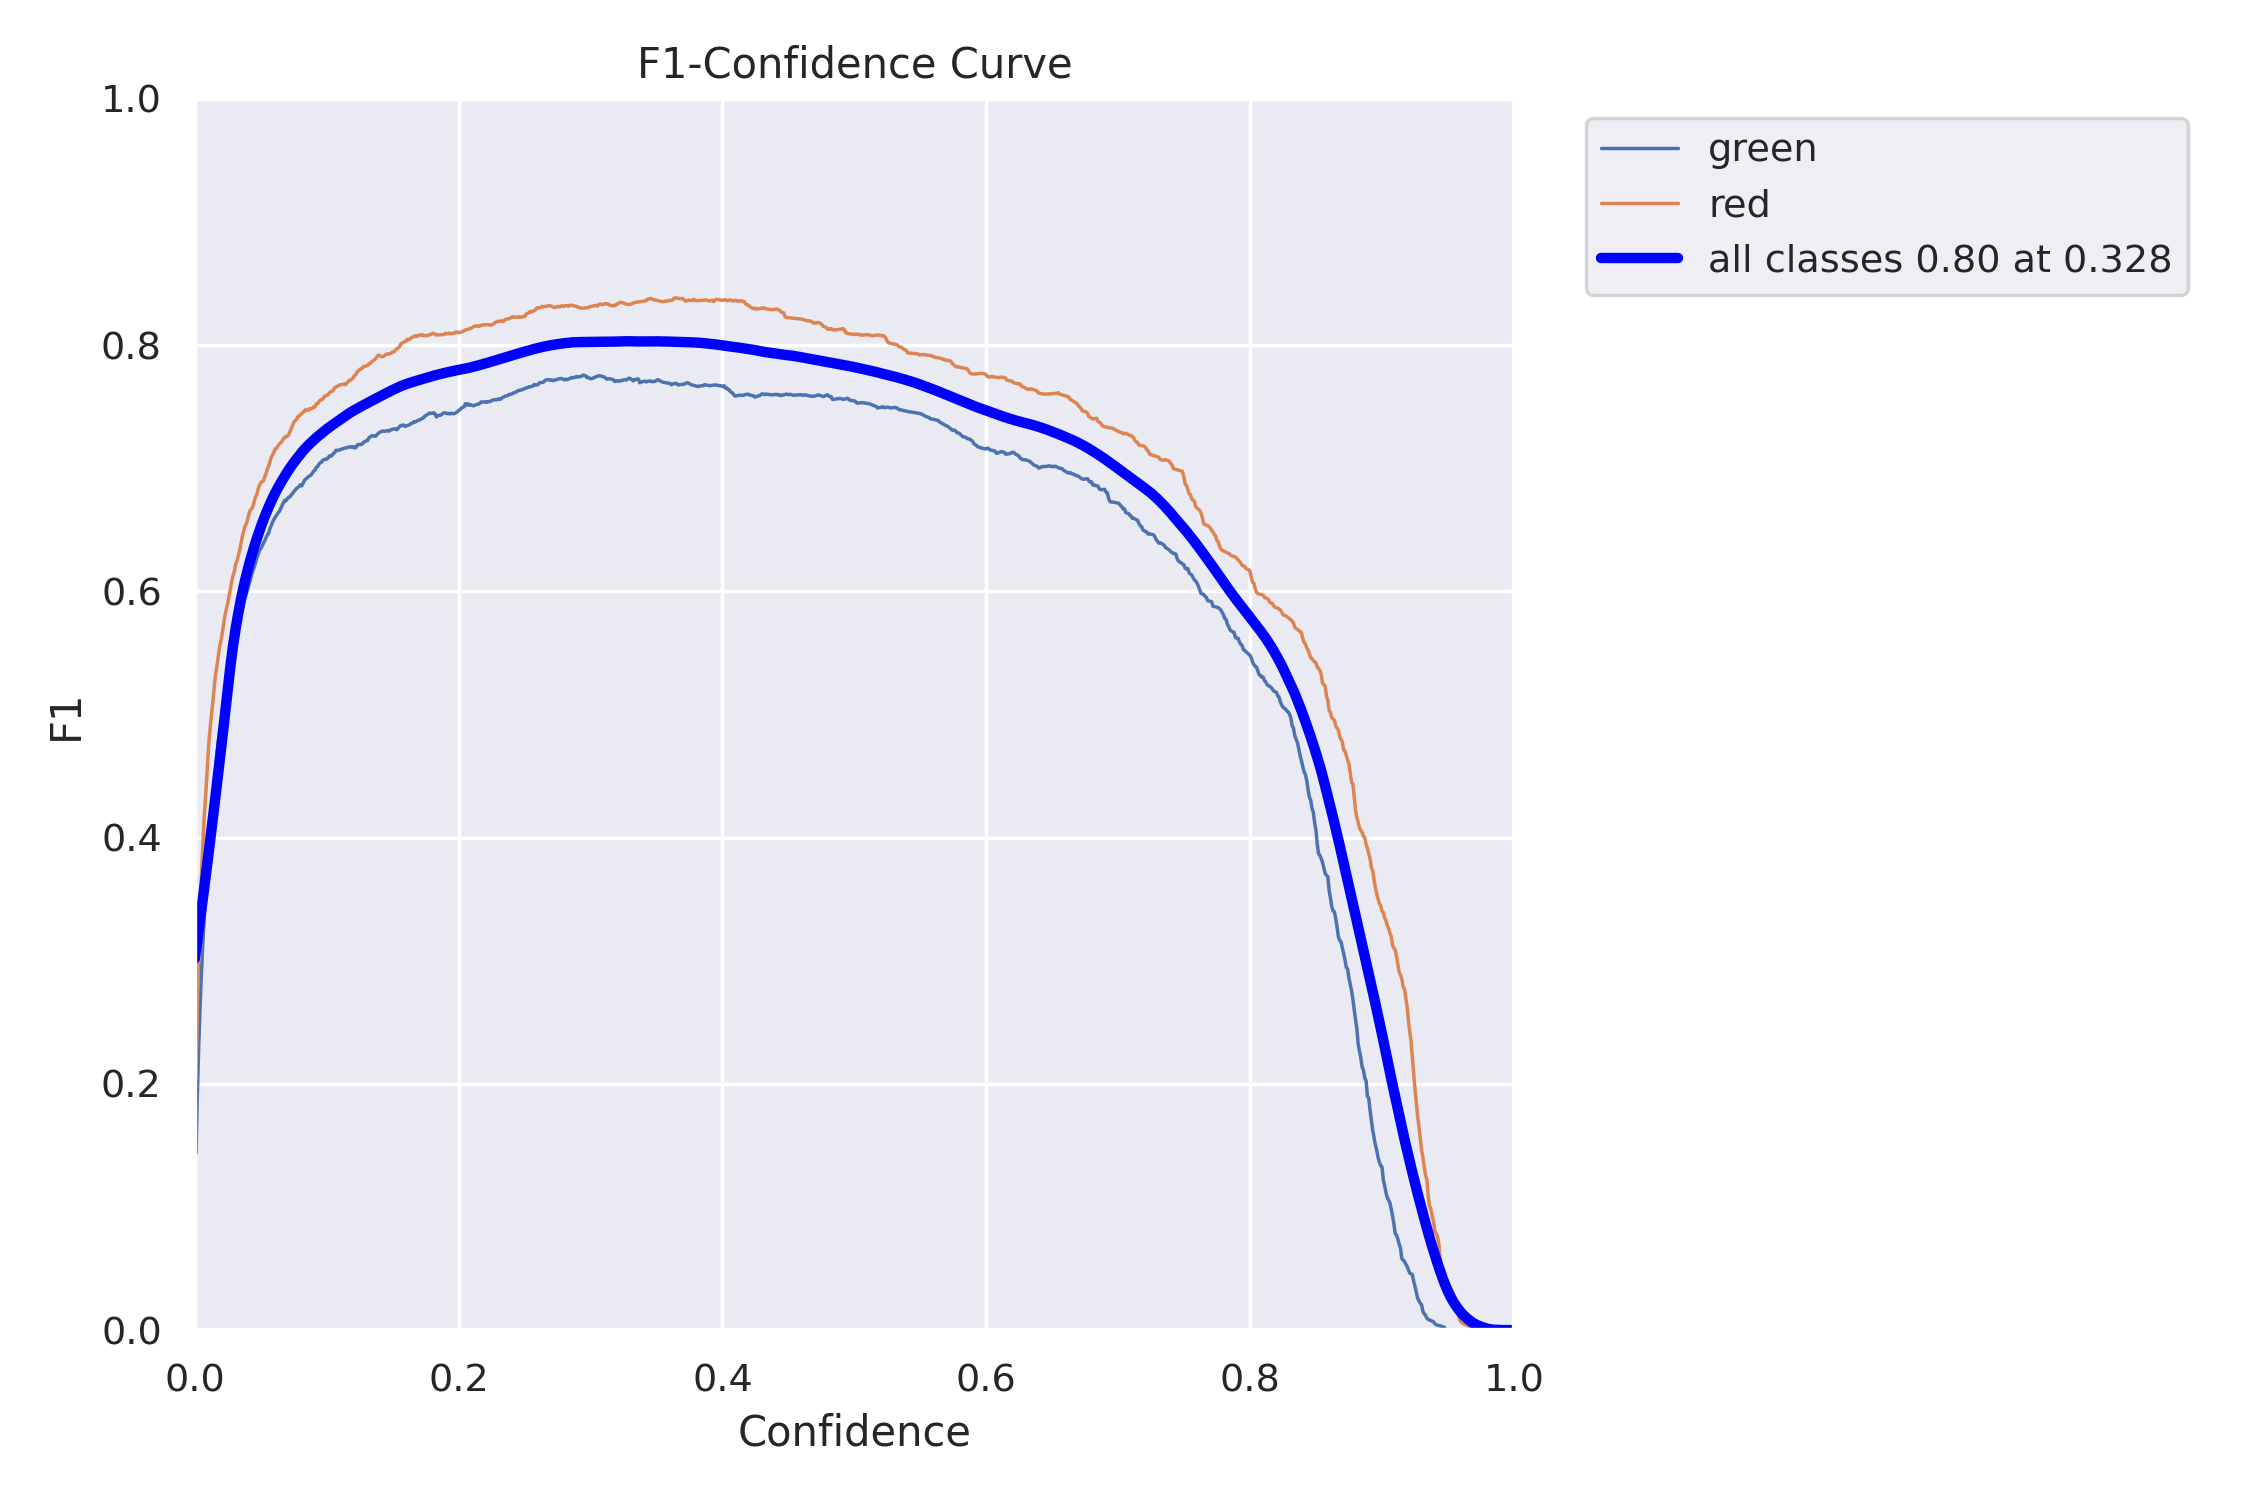

In [ ]:
Image(filename='runs/detect/train/F1_curve.png', width=600)

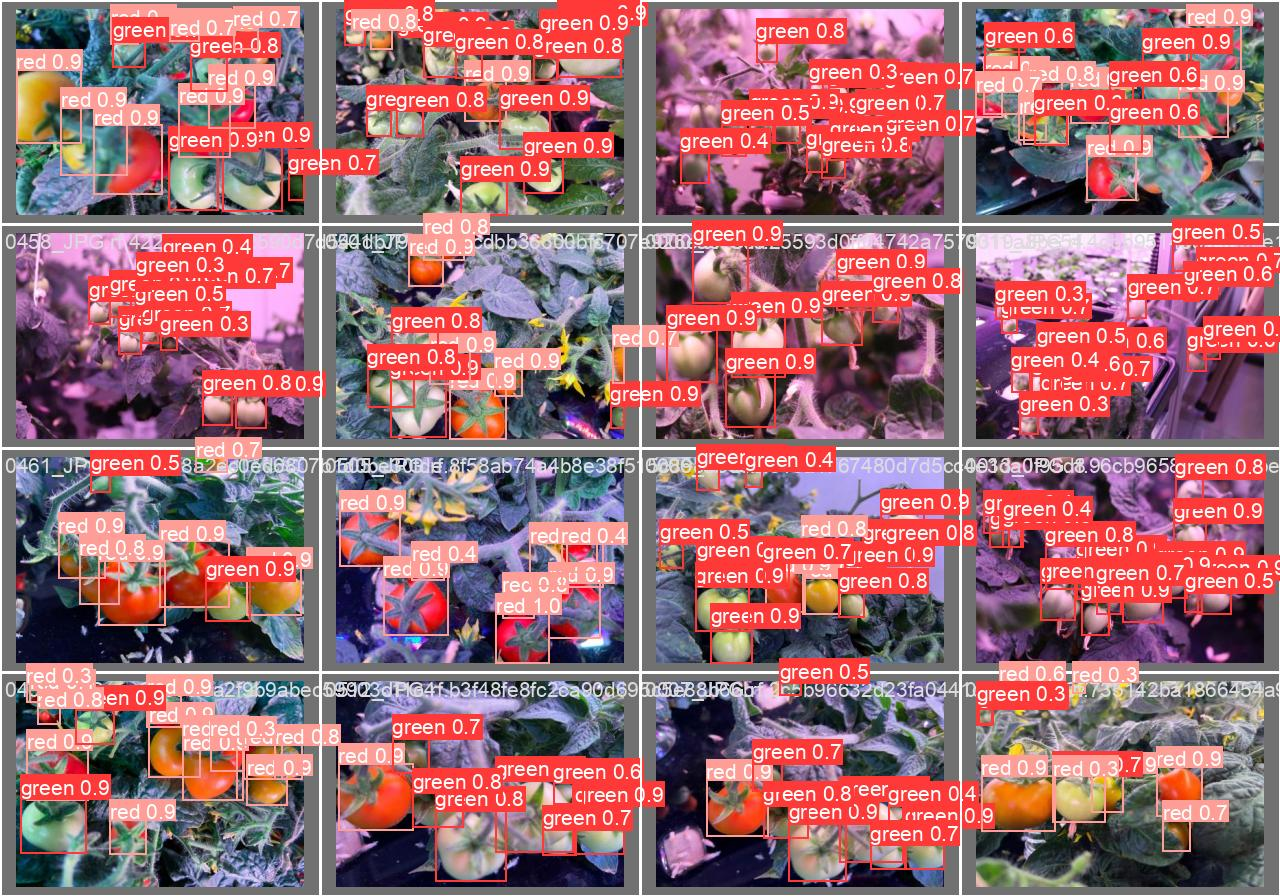

In [ ]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd /content/drive/MyDrive/Assignment 3

!yolo task=detect mode=val model='runs/detect/train/weights/best.pt' data=data.yaml

/content/drive/MyDrive/Assignment 3
2024-05-20 11:45:04.740010: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-20 11:45:04.740069: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-20 11:45:04.742038: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-20 11:45:06.270469: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
100% 755k/755k [00:00<00:00, 33.0MB/s

In [ ]:
import numpy as np

csv_file_path = '/content/drive/MyDrive/Assignment 3/runs/detect/train/results.csv'
data = np.genfromtxt(csv_file_path, delimiter=',', skip_header=1)

print(data)


[[0.0000e+00 1.8348e+00 2.9694e+00 1.3447e+00 4.0060e-01 4.4832e-01
  3.3213e-01 1.6904e-01 1.5079e+00 3.0467e+00 1.1486e+00 8.0200e-02
  2.2000e-03 2.2000e-03]
 [1.0000e+00 1.4462e+00 1.1250e+00 1.1039e+00 6.9704e-01 5.7989e-01
  6.2276e-01 3.6674e-01 1.3913e+00 2.1783e+00 1.0816e+00 5.9352e-02
  4.3515e-03 4.3515e-03]
 [2.0000e+00 1.3705e+00 9.8027e-01 1.0533e+00 7.6006e-01 6.0945e-01
  6.7846e-01 4.2583e-01 1.2124e+00 1.4892e+00 9.9746e-01 3.8351e-02
  6.3512e-03 6.3512e-03]
 [3.0000e+00 1.3308e+00 9.9666e-01 1.0103e+00 7.5261e-01 6.2920e-01
  7.2075e-01 4.6696e-01 1.1829e+00 8.7649e-01 9.6689e-01 1.7199e-02
  8.1991e-03 8.1991e-03]
 [4.0000e+00 1.3339e+00 9.4614e-01 1.0049e+00 7.7562e-01 6.5280e-01
  7.3638e-01 4.4564e-01 1.2453e+00 9.7787e-01 9.8389e-01 8.6800e-03
  8.6800e-03 8.6800e-03]
 [5.0000e+00 1.3518e+00 9.0418e-01 1.0086e+00 7.8834e-01 6.3000e-01
  7.3073e-01 4.3386e-01 1.3131e+00 9.6869e-01 9.9882e-01 8.6800e-03
  8.6800e-03 8.6800e-03]
 [6.0000e+00 1.3143e+00 8.8290e-01

<ipython-input-53-7120750dd53a>:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 2)


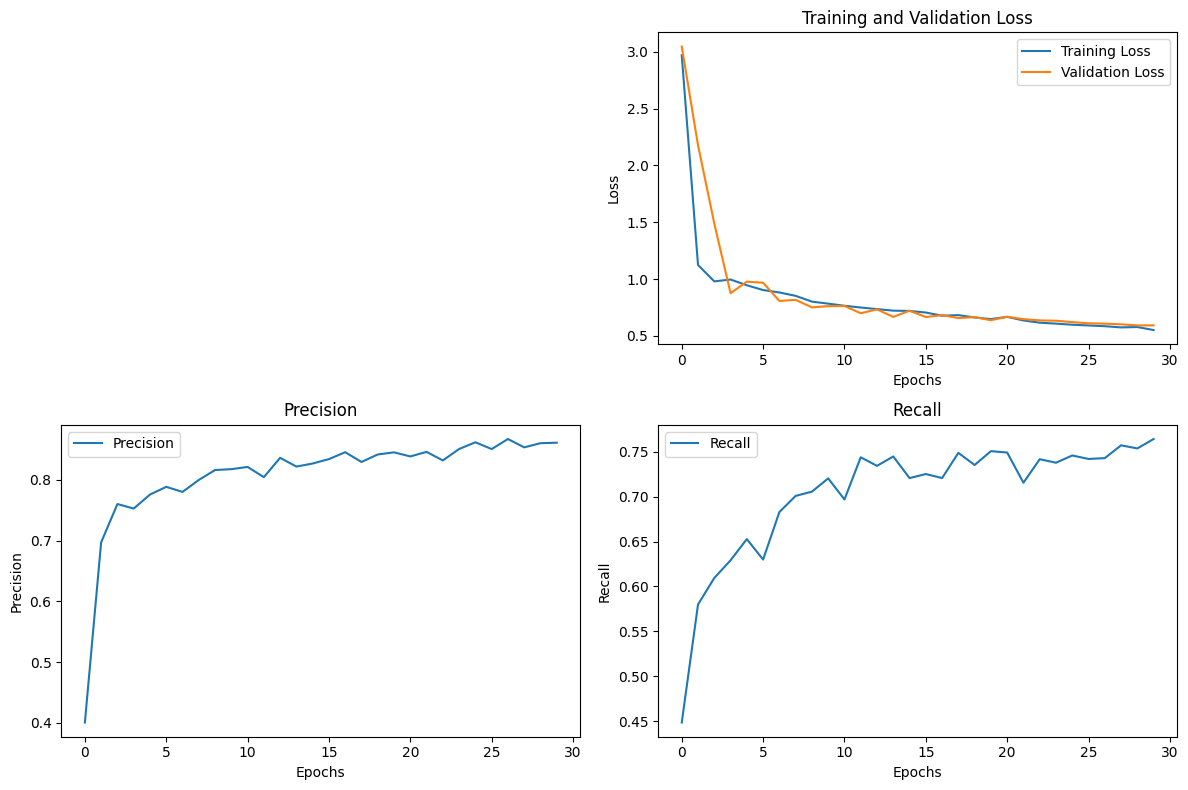

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(data[:, 0], data[:, 1], label='Train Box Loss')
plt.plot(data[:, 0], data[:, 8], label='Val Box Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Box Loss')

plt.subplot(2, 2, 2)
plt.plot(data[:, 0], data[:, 2], label='Training Loss')
plt.plot(data[:, 0], data[:, 9], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(2, 2, 3)
plt.plot(data[:, 0], data[:, 4], label='Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision')

plt.subplot(2, 2, 4)
plt.plot(data[:, 0], data[:, 5], label='Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.title('Recall')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from tabulate import tabulate


results_csv_path = '/content/drive/MyDrive/Assignment 3/runs/detect/train/results.csv'
results_df = pd.read_csv(results_csv_path)

accuracy_values = results_df['       metrics/mAP50(B)']
precision_values = results_df['   metrics/precision(B)']
recall_values = results_df['      metrics/recall(B)']

f1_scores = 2 * (precision_values * recall_values) / (precision_values + recall_values)

average_accuracy = accuracy_values.mean()
average_precision = precision_values.mean()
average_recall = recall_values.mean()
average_f1_score = f1_scores.mean()

metrics = {
    'Model': ['YOLOv8'],
    'Accuracy': [f"{average_accuracy:.2%}"],
    'Precision': [f"{average_precision:.2%}"],
    'Recall': [f"{average_recall:.2%}"],
    'F1 score': [f"{average_f1_score:.2%}"]
}

average_metrics_df = pd.DataFrame(metrics)

print(tabulate(average_metrics_df, headers='keys', tablefmt='grid'))

+----+---------+------------+-------------+----------+------------+
|    | Model   | Accuracy   | Precision   | Recall   | F1 score   |
+====+=========+============+=============+==========+============+
|  0 | YOLOv8  | 84.51%     | 86.10%      | 76.44%   | 80.98%     |
+----+---------+------------+-------------+----------+------------+


In [ ]:
import pandas as pd
from tabulate import tabulate

results_csv_path = '/content/drive/MyDrive/Assignment 3/runs/detect/train/results.csv'
results_df = pd.read_csv(results_csv_path)


last_epoch = results_df.iloc[-1]
results_df.head()

precision = last_epoch['   metrics/precision(B)']
recall = last_epoch['      metrics/recall(B)']
f1_score = 2 * (precision * recall) / (precision + recall)

metrics = {
    'Model': ['YOLOv8'],
    'Accuracy': [f"{last_epoch['       metrics/mAP50(B)']:.2%}"],
    'Precision': [f"{precision:.2%}"],
    'Recall': [f"{recall:.2%}"],
    'F1 score': [f"{f1_score:.2%}"]
}

metrics_df = pd.DataFrame(metrics)

print(tabulate(metrics_df, headers='keys', tablefmt='grid'))

+----+---------+------------+-------------+----------+------------+
|    | Model   | Accuracy   | Precision   | Recall   | F1 score   |
+====+=========+============+=============+==========+============+
|  0 | YOLOv8  | 78.07%     | 80.71%      | 70.45%   | 75.19%     |
+----+---------+------------+-------------+----------+------------+
